In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.shape

(545, 13)

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df['price'] = df['price'].astype('float')

In [11]:
df.dtypes

price               float64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [12]:
categorical_columns= ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

In [13]:
# one-hot encoding for furnishingstatus column
df= pd.get_dummies(df, columns=['furnishingstatus'], drop_first= True)

In [14]:
#encoding for categorical columns
le= LabelEncoder()
for column in categorical_columns:
    df[column]= le.fit_transform(df[column].str.lower())

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000.0,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000.0,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000.0,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000.0,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
df['furnishingstatus_semi-furnished'].value_counts()

0    318
1    227
Name: furnishingstatus_semi-furnished, dtype: int64

In [17]:
df['furnishingstatus_unfurnished'].value_counts()

0    367
1    178
Name: furnishingstatus_unfurnished, dtype: int64

In [18]:
# furnished houses
furnished_count = (df['furnishingstatus_semi-furnished'] == 0) + (df['furnishingstatus_unfurnished'] == 0)


In [19]:
furnished_count.value_counts()

True    545
dtype: int64

There are:
- 227 semi-furnished house.
- 178 unfurnished houses.
- 545 furnished houses.

In [20]:
corr = df.corr(numeric_only=True) 

In [21]:
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


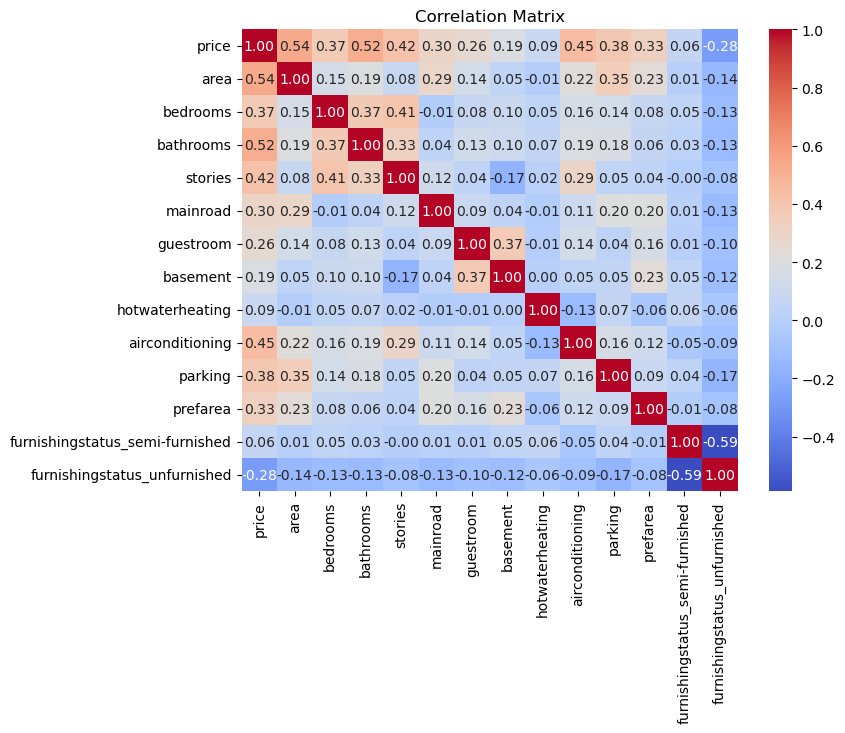

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot= True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- annot=True means show the correlation values (numbers) inside the squares.

- cmap='coolwarm' gives the plot a blue-to-red color range — blue for low/negative correlations, red for high/positive ones.

Cmap -means colorMap. It can be 'RdBu'- Red → white → blue, 'bwr'-Blue → white → red (simpler, 'seismic'-Intense blue ↔ red.
Also, fmt=".2f" -format numbers with 2 decimal places (.2f = float with 2 decimals)

### Check for Multicollinearity and Addressing it

1. After creating a correlation heatmap, look for pairs of independent variables (your features, not the target) that have:

- a correlation coefficient above +0.8 or below –0.8. They are highly correlated → possible multicollinearity.

2. Use VIF (Variance Inflation Factor)- used to find which features are redundant.

   Most Common: To solve drop the variable with the highest VIF, and recalculate until all are < 5 (or 10).
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation (usually acceptable)
- 5 < VIF < 10: High correlation (concerning)
- VIF > 10: Severe multicollinearity (action needed!)

3. Combine correlated variables- If two features convey the same info, you can merge them i.e take their average, sum, or ratio.

   This helps retain information while removing redundancy.

4. Dimensionality reduction (PCA)- Use Principal Component Analysis (PCA) to create new uncorrelated features (components).

   PCA transforms correlated variables into fewer, independent components.

5. Regularization methods- If you don’t want to drop variables but want to reduce the effect of collinearity:
- Use regularized regression models, such as Ridge Regression (L2) and Lasso Regression (L1)
  
6. Use tree-based models such as 

- Decision Tree

- Random Forest

- XGBoost

- Gradient Boosting

These models aren’t affected much by multicollinearity — they automatically decide which feature to split on and ignore redundancy.



In [23]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1️⃣ Define features (exclude target)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'parking', 'prefarea', 'furnishingstatus_semi-furnished',
        'furnishingstatus_unfurnished']]

# 2️⃣ Add constant for intercept
X = add_constant(X)

# 3️⃣ Compute VIF for each column
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4️⃣ Display
print(vif_data)

                            Feature        VIF
0                             const  33.384521
1                              area   1.325250
2                          bedrooms   1.369477
3                         bathrooms   1.286621
4                           stories   1.478055
5                          mainroad   1.172728
6                         guestroom   1.212838
7                          basement   1.323050
8                   hotwaterheating   1.041506
9                   airconditioning   1.211840
10                          parking   1.212837
11                         prefarea   1.149196
12  furnishingstatus_semi-furnished   1.578233
13     furnishingstatus_unfurnished   1.674139


All the VIF values (except const) are below 2.

That means the features are not strongly correlated with each other.

- Hence no multicollinearity problem

In [24]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Define X (without price)
X = df.drop('price', axis=1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)  # keep all to inspect variance
X_pca = pca.fit_transform(X_scaled)

In [25]:
X_pca

array([[ 3.12282842, -1.78029642,  0.01474129, ...,  0.62461939,
        -0.37282978, -0.696418  ],
       [ 4.94822107, -3.37303602,  1.67695389, ...,  1.01756972,
         0.36856551, -0.51748621],
       [ 2.7432079 ,  1.30327221, -0.47669534, ...,  0.08862503,
         1.22816788,  0.50177111],
       ...,
       [-2.4960703 , -0.48489116, -0.85588636, ...,  0.01151947,
        -0.28736181,  0.26902163],
       [-2.24467251, -0.04457799,  0.91266814, ...,  0.23142551,
        -0.4174451 , -1.47828654],
       [-1.64133814, -1.32321828, -0.22805594, ..., -0.2095698 ,
        -0.09891081,  0.29013697]])

In [26]:
print(pca.explained_variance_ratio_)

[0.18997389 0.12098787 0.11539005 0.09814425 0.08342919 0.06841146
 0.06359535 0.05676463 0.04998266 0.04822389 0.04409163 0.0319304
 0.02907474]


In [27]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18997389, 0.31096176, 0.42635181, 0.52449606, 0.60792525,
       0.6763367 , 0.73993205, 0.79669668, 0.84667934, 0.89490323,
       0.93899486, 0.97092526, 1.        ])

- Each row → represents one observation (like one house).
- Each column → represents one principal component.
- PCA transformation preserved all the variance (information) in your dataset.

In [29]:
#choose components to keep
pca = PCA(n_components=0.95)   # keep enough components to explain 95% of variance
X_reduced = pca.fit_transform(X_scaled)

- Use the X_reduced for modelling now.

#### Correlation Analysis Summary

##### Strongest Positive Correlations with Price:

- Area (0.54): 
  Moderate-to-strong positive relationship. Larger properties command higher prices, making this the  strongest predictor in the dataset.
- Bathrooms (0.52): 
  More bathrooms significantly increase home value, possibly reflecting luxury and convenience.
- Stories (0.42): 
  Multi-story homes tend to be priced higher, though the relationship is weaker than area or bathrooms.

##### Moderate Positive Correlations with Price:

- Airconditioning (0.45):
  Homes with AC are notably more expensive, likely reflecting comfort features or regional climate needs.
- Parking (0.38):
  More parking spaces correlate with higher prices, though less strongly than structural features.
- Bedrooms (0.37): 
  Has weaker than bathrooms. More bedrooms increase price, but not as dramatically as other features.
- Prefarea (0.33): 
  Location in a preferred area moderately boosts price.
- Mainroad (0.30): 
  Main road access has a modest positive effect on price.
- Guestroom (0.26): 
  Presence of a guestroom shows a weak-to-moderate positive correlation.

##### Weak or No Correlation with Price:
- Hotwaterheating (0.09): 
  Heating type is not a meaningful price predictor.
- Furnishingstatus_semi-furnished (-0.06): 
  Semi-furnished status has almost no impact on price.

In [ ]:
#### Top Predictors 
The strongest predictors are:
- area (0.54) 
- bathrooms (0.52) 
- airconditioning(0.45)
- stories (0.42)
- Parking (0.38)
- Bedrooms (0.37)



#### Observations:
- Bedrooms vs. Bathrooms: Bathrooms (0.52) are more predictive than bedrooms (0.37). This suggests buyers value bathroom count more than bedroom count—possibly reflecting quality over quantity.
- Airconditioning: The high correlation (0.45) suggests this is either a luxury feature or a regional necessity that significantly impacts value.
- Parking: At 0.38, parking spaces are more important than bedrooms for price prediction.
- Furnishing: The negative correlation for unfurnished homes (-0.28) indicates furnished properties command a premium, though the effect is modest.
- Prefarea: At 0.33, preferred area matters, but less than you might expect compared to other features.

#### Distributions

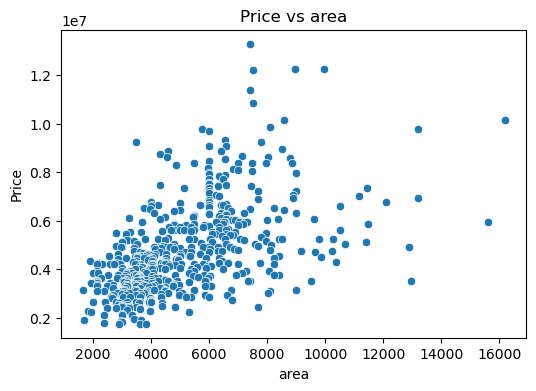

<Figure size 640x480 with 0 Axes>

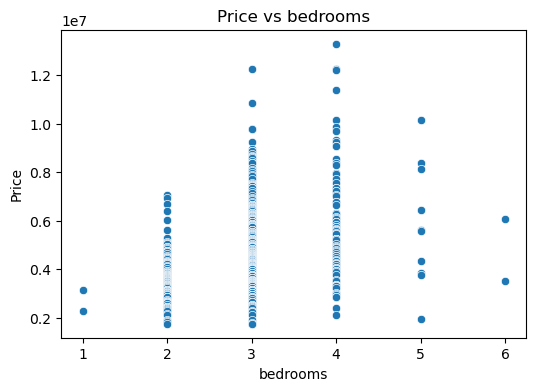

<Figure size 640x480 with 0 Axes>

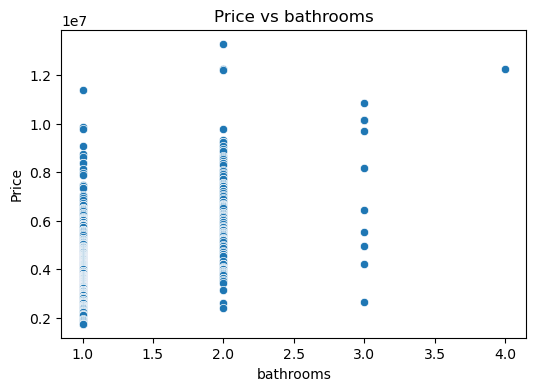

<Figure size 640x480 with 0 Axes>

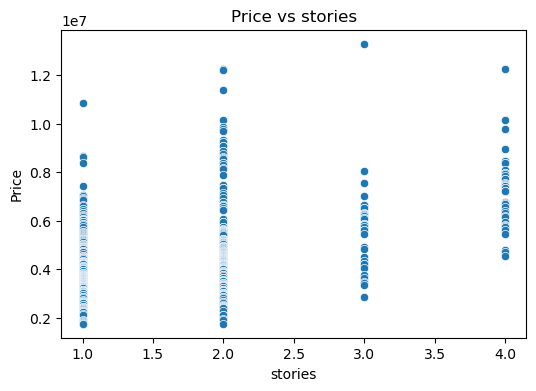

<Figure size 640x480 with 0 Axes>

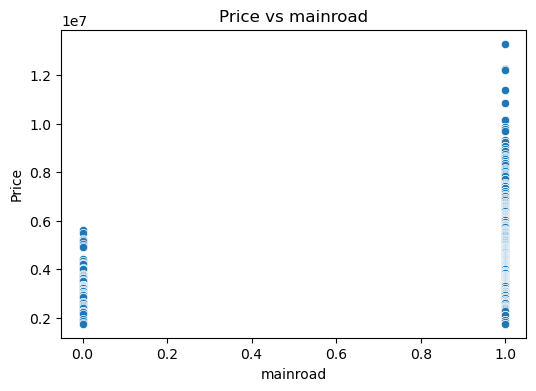

<Figure size 640x480 with 0 Axes>

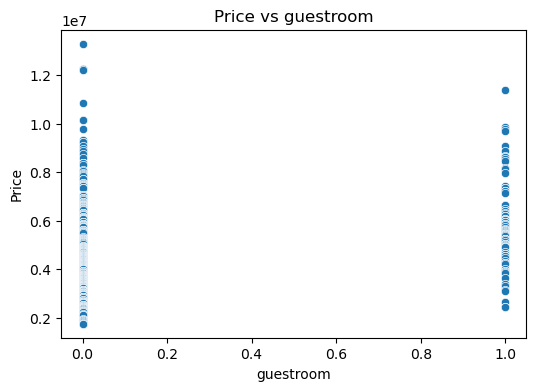

<Figure size 640x480 with 0 Axes>

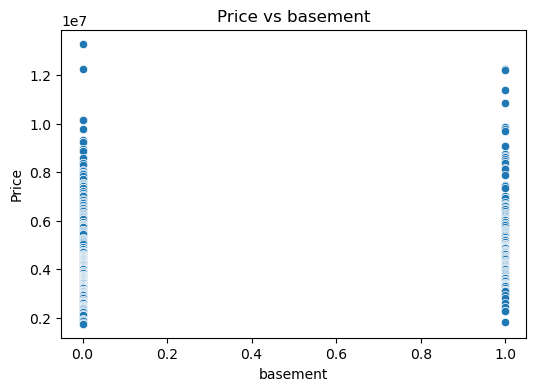

<Figure size 640x480 with 0 Axes>

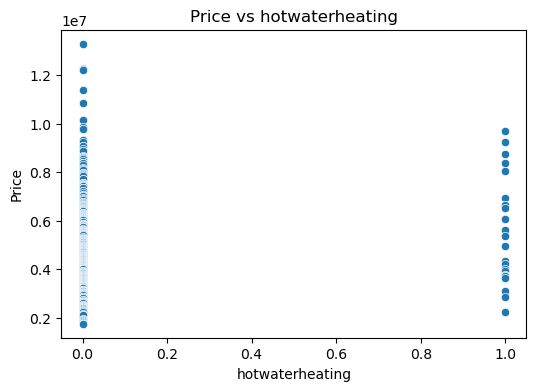

<Figure size 640x480 with 0 Axes>

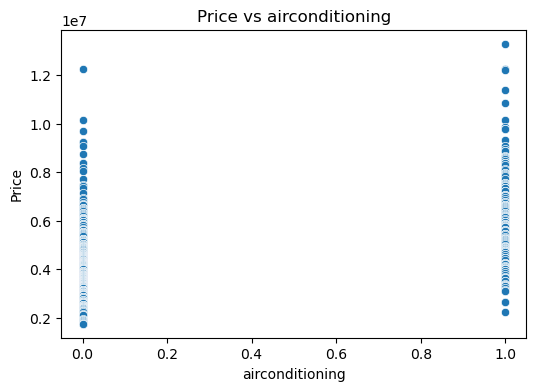

<Figure size 640x480 with 0 Axes>

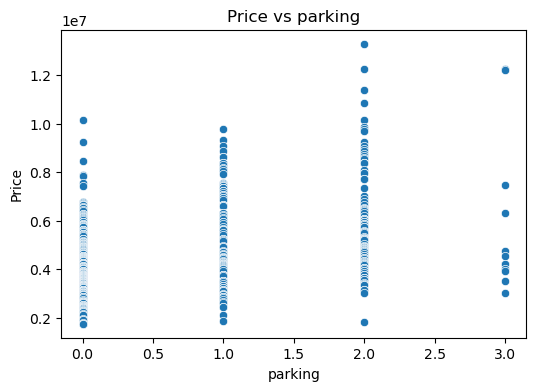

<Figure size 640x480 with 0 Axes>

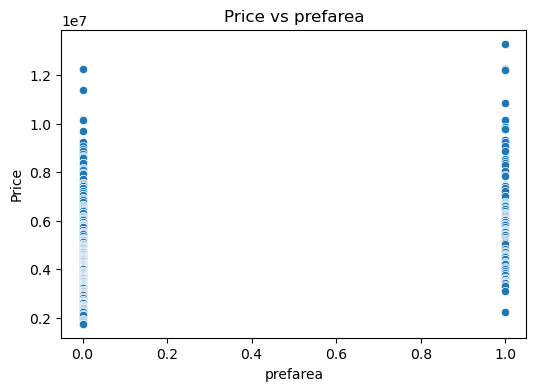

<Figure size 640x480 with 0 Axes>

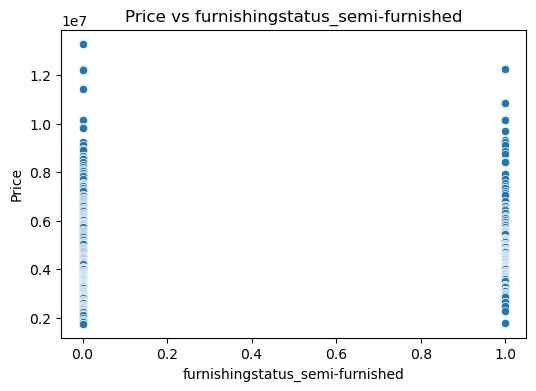

<Figure size 640x480 with 0 Axes>

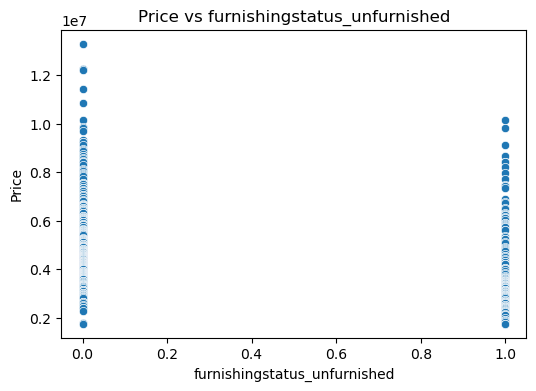

<Figure size 640x480 with 0 Axes>

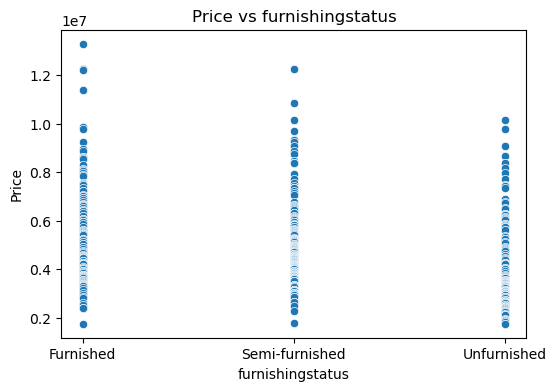

<Figure size 640x480 with 0 Axes>

In [52]:
# target variable 
target = 'price'

# list all features except the target
features = df.columns.drop(target)

# loop through each feature and plot
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()
    # save the figure before showing
    filename = f"pricevs {feature}.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300) 

### Observations
- Area: larger homes have higher prices, with a clear upward trend.
- Bedrooms: Generally more bedrooms  indicate higher prices (peaks at 4 bedrooms, slight decline at 5-6).
- Bathrooms: More number of bathrooms associated with higher prices.
- Stories: More stories generally mean higher prices, though the effect is moderate.
- Mainroad: Properties on main roads are significantly more expensive.
- Guestroom: Homes with guestrooms have  higher prices.
- Basement: Properties with basements are more valuable.
- Hotwaterheating: Homes with hot water heating cost more.
- Airconditioning: AC-equipped homes have higher prices.
- Prefarea: Properties in preferred areas are substantially more expensive.
- Parking: More parking spaces generally mean higher prices.

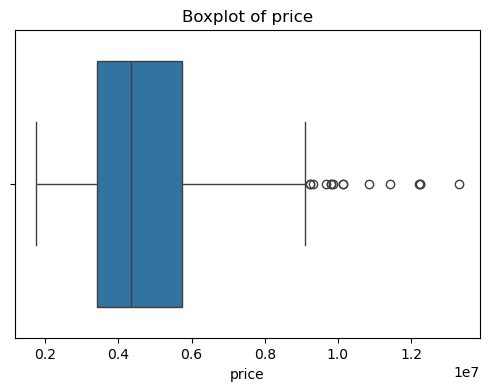

<Figure size 640x480 with 0 Axes>

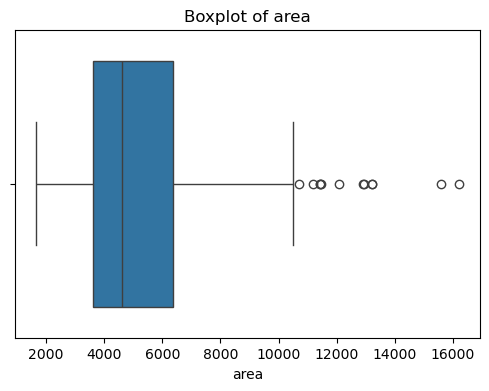

<Figure size 640x480 with 0 Axes>

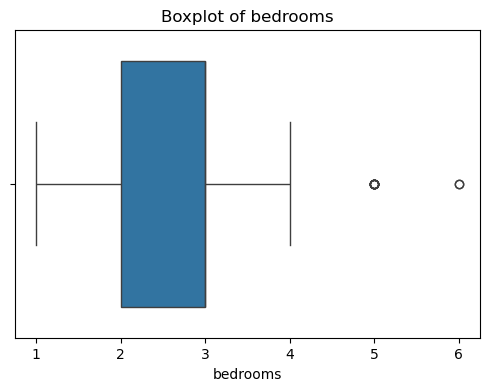

<Figure size 640x480 with 0 Axes>

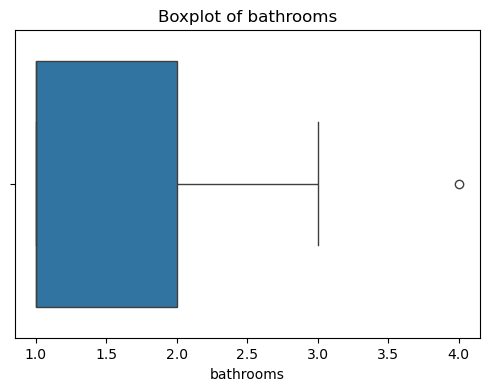

<Figure size 640x480 with 0 Axes>

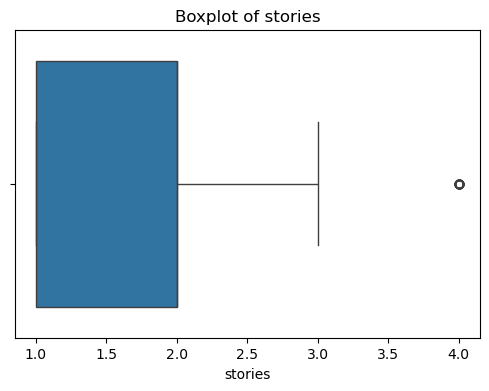

<Figure size 640x480 with 0 Axes>

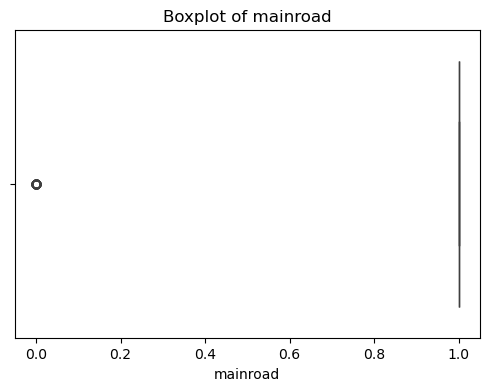

<Figure size 640x480 with 0 Axes>

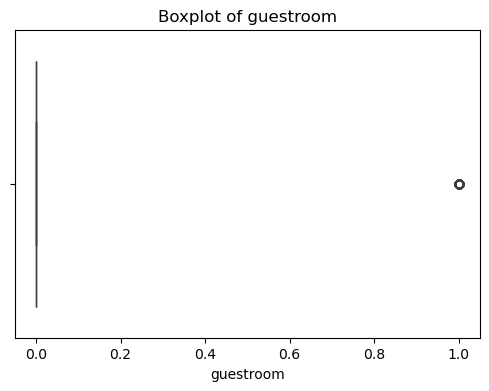

<Figure size 640x480 with 0 Axes>

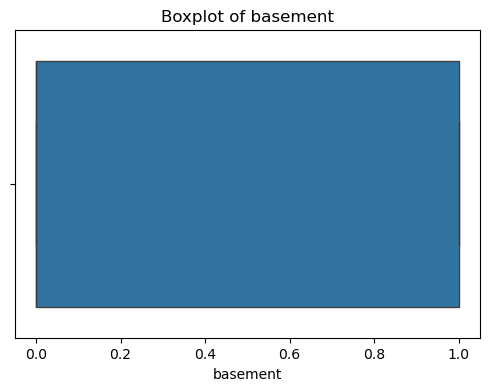

<Figure size 640x480 with 0 Axes>

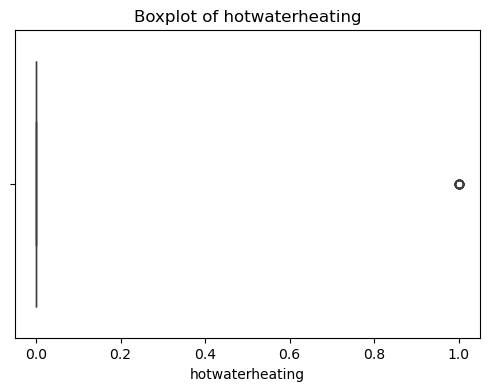

<Figure size 640x480 with 0 Axes>

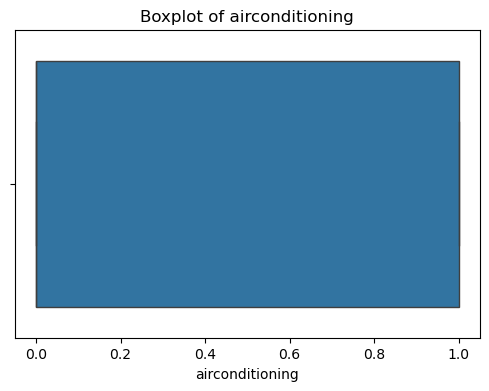

<Figure size 640x480 with 0 Axes>

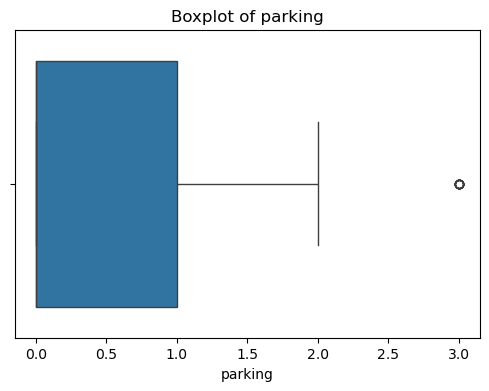

<Figure size 640x480 with 0 Axes>

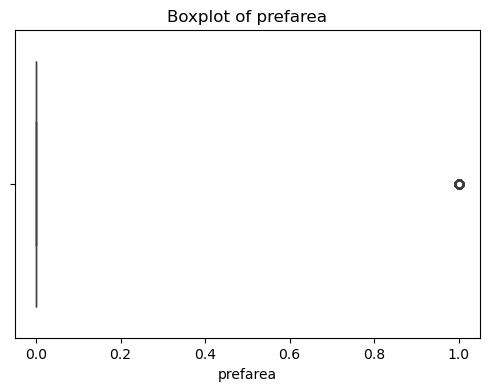

<Figure size 640x480 with 0 Axes>

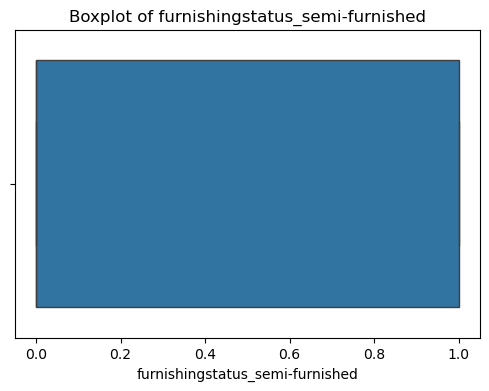

<Figure size 640x480 with 0 Axes>

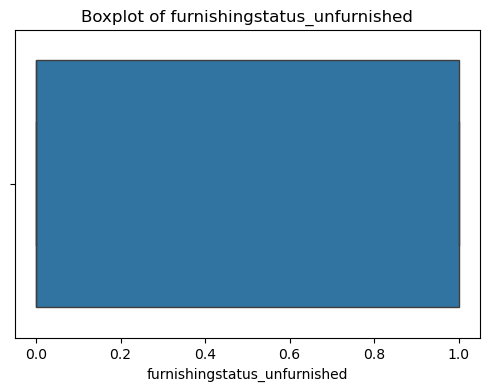

<Figure size 640x480 with 0 Axes>

In [53]:
# Boxplot
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'uint8']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    # Save the plot as a PNG file
    plt.savefig(f'boxplot_{col}.png', bbox_inches='tight')

- Most homes are modest: 3 bedrooms, 2 bathrooms, 2 stories, ~5,000 sq ft.
- Luxury features are rare: Large areas, many bedrooms/bathrooms, multiple parking spaces.
- Location matters: Mainroad access is common; preferred areas are exclusive majority of the houses are not in preferred areas.
- Amenities vary: AC, basement, and furnishing are relatively balanced across properties.
- Premium features: Guestrooms and hot water heating are uncommon luxury additions.

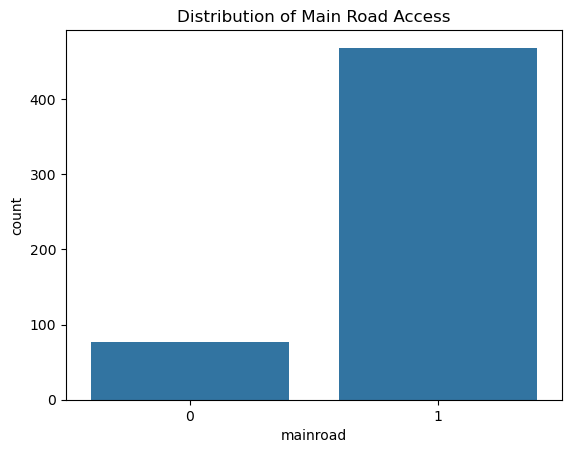

In [54]:
sns.countplot(data=df, x='mainroad')
plt.title('Distribution of Main Road Access')
# Save the plot as a PNG file
plt.savefig('countplot_mainroad.png', bbox_inches='tight')

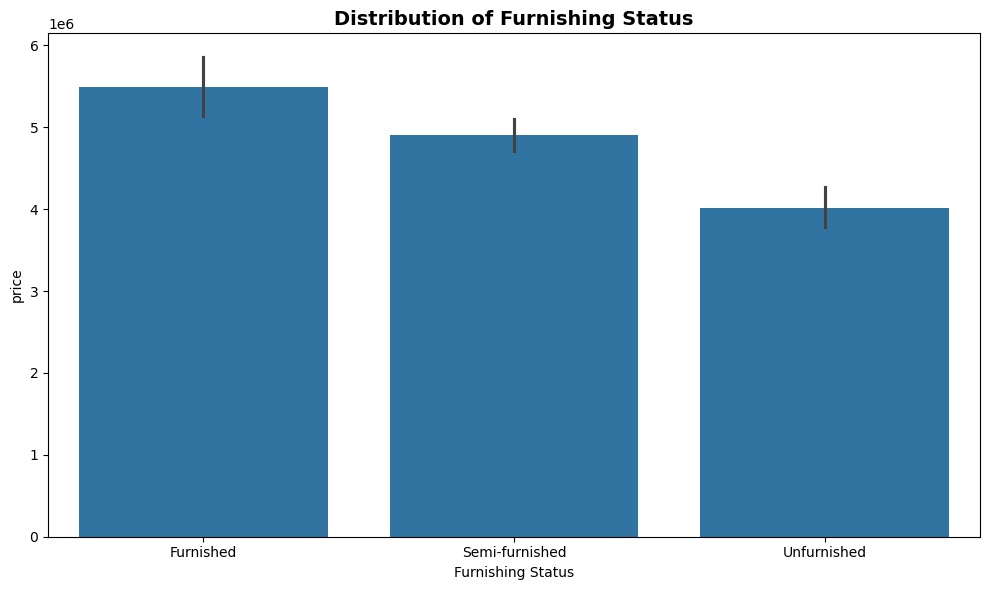

<Figure size 640x480 with 0 Axes>

In [55]:
# Recreate the original categorical column
def get_furnishing_status(row):
    if row['furnishingstatus_unfurnished'] == 1:
        return 'Unfurnished'
    elif row['furnishingstatus_semi-furnished'] == 1:
        return 'Semi-furnished'
    else:
        return 'Furnished'

df['furnishingstatus'] = df.apply(get_furnishing_status, axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='furnishingstatus', y='price', order=['Furnished', 'Semi-furnished', 'Unfurnished'])
plt.title('Distribution of Furnishing Status', fontsize=14, fontweight='bold')
plt.xlabel('Furnishing Status')
plt.ylabel('price')
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('barplot_furnishing_status.png', bbox_inches='tight')

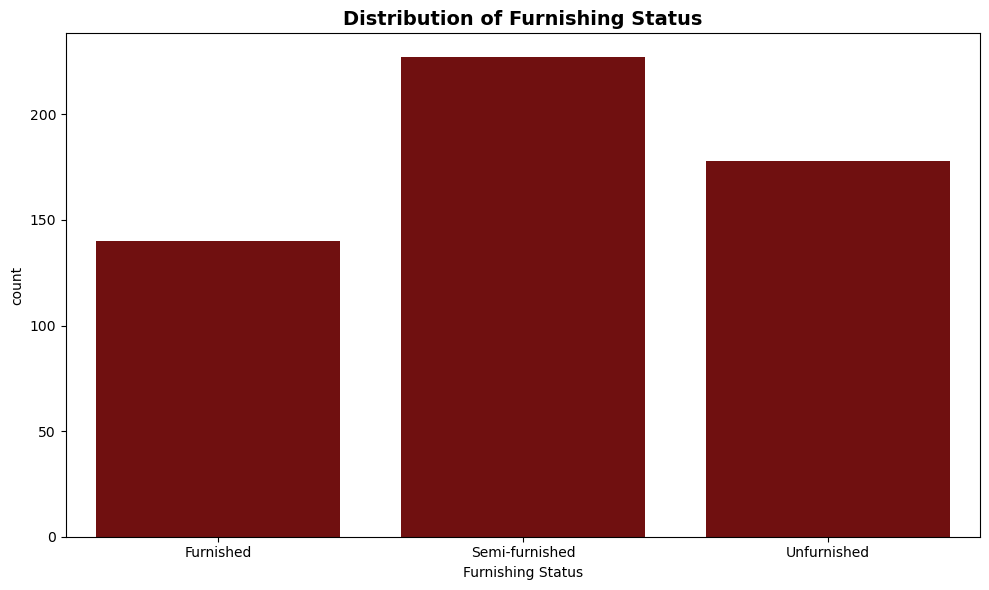

<Figure size 640x480 with 0 Axes>

In [56]:
df['furnishingstatus'] = df.apply(get_furnishing_status, axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='furnishingstatus', order=['Furnished', 'Semi-furnished', 'Unfurnished'], color= 'maroon')
plt.title('Distribution of Furnishing Status', fontsize=14, fontweight='bold')
plt.xlabel('Furnishing Status')
plt.ylabel('count')
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('barplot_furnishing_status.png', bbox_inches='tight')

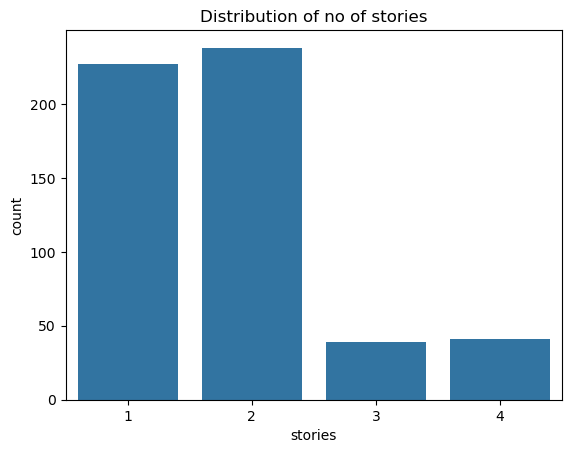

In [57]:
sns.countplot(data=df, x='stories')
plt.title('Distribution of no of stories')
# Save the plot as a PNG file
plt.savefig('countplot_stories.png', bbox_inches='tight')

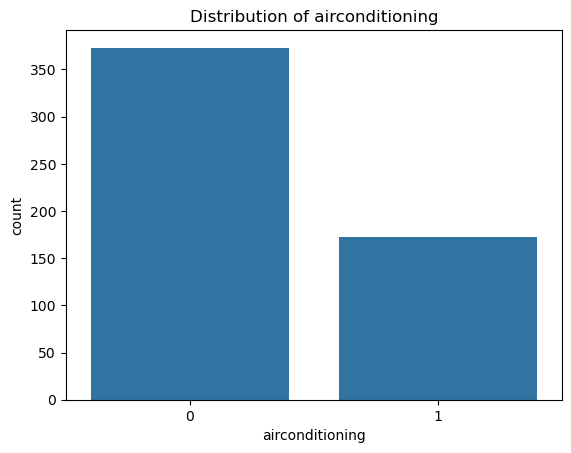

In [58]:
sns.countplot(data=df, x='airconditioning')
plt.title('Distribution of airconditioning')
# Save the plot as a PNG file
plt.savefig('countplot_airconditioning.png', bbox_inches='tight')

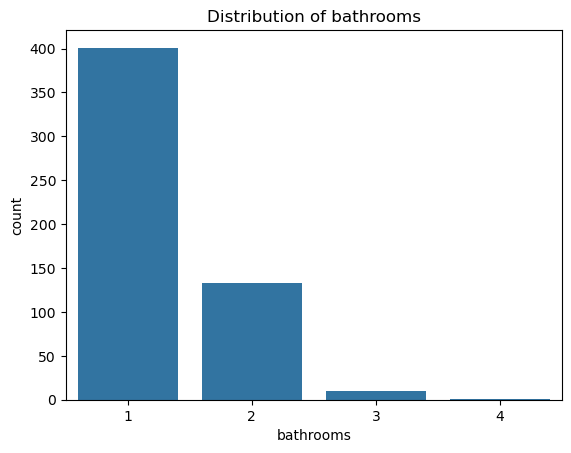

In [59]:
sns.countplot(data=df, x='bathrooms')
plt.title('Distribution of bathrooms')
# Save the plot as a PNG file
plt.savefig('countplot_bathrooms.png', bbox_inches='tight')

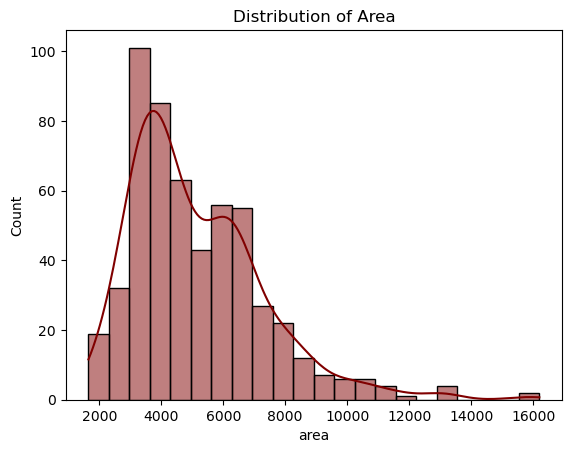

In [60]:
sns.histplot(data=df, x='area', color= 'maroon', kde=True)
plt.title('Distribution of Area')
# Save the plot as a PNG file
plt.savefig('histogram_area.png', bbox_inches='tight')

#### Relationship Analysis

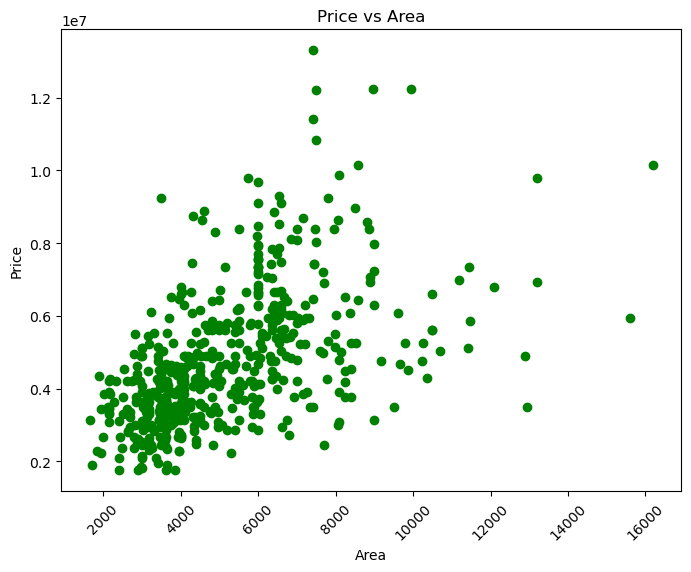

<Figure size 640x480 with 0 Axes>

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(df['area'], df['price'], color= 'green')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
# Save the plot
plt.savefig('scatter_price_vs_area.png', bbox_inches='tight')

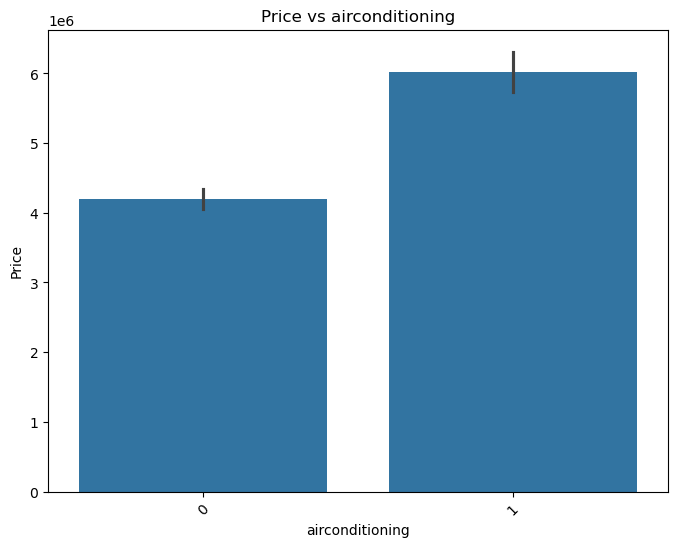

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x= df['airconditioning'], y= df['price'])
plt.title('Price vs airconditioning')
plt.xlabel('airconditioning')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
# Save the plot
plt.savefig('barplot_price_vs_airconditioning.png', bbox_inches='tight')

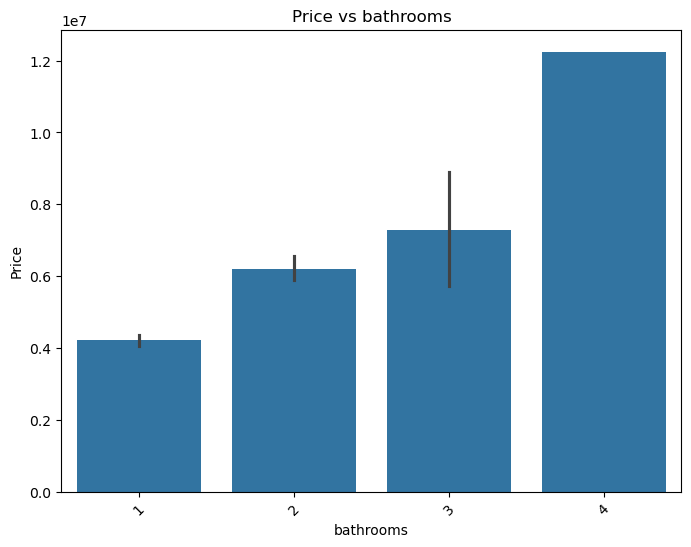

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'bathrooms', y= 'price',data=df)
plt.title('Price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
# Save the plot
plt.savefig('barplot_price_vs_bathrooms.png', bbox_inches='tight')

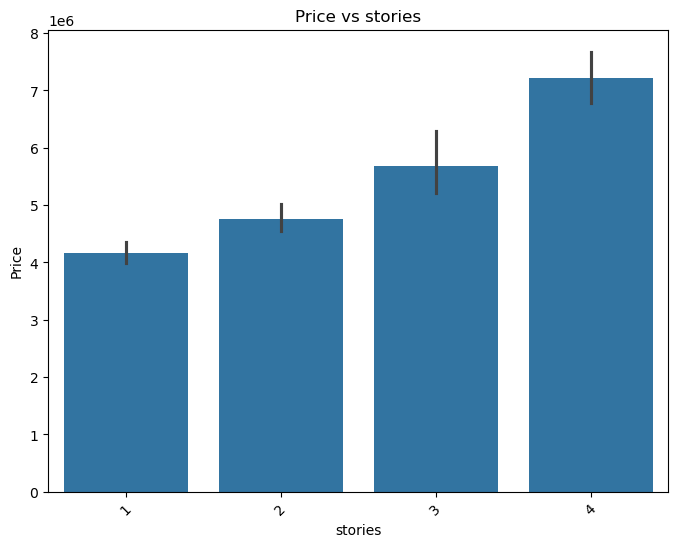

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'stories', y= 'price',data=df, estimator='mean')
plt.title('Price vs stories')
plt.xlabel('stories')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.savefig('barplot_Price vs stories.png', bbox_inches='tight')

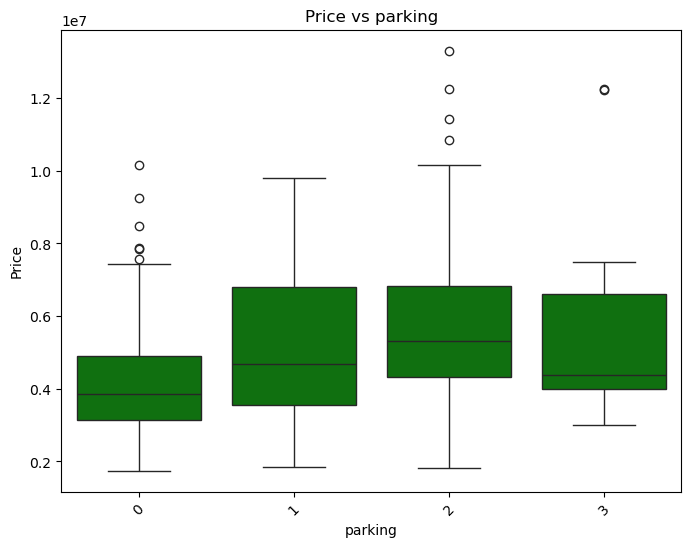

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['parking'], y= df['price'] ,color= 'green')
plt.title('Price vs parking')
plt.xlabel('parking')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
plt.savefig('boxplot_Price vs parking.png', bbox_inches='tight')

In [44]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

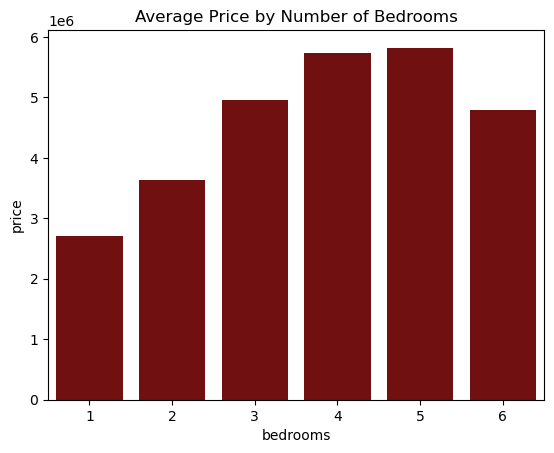

<Figure size 640x480 with 0 Axes>

In [66]:
sns.barplot(x='bedrooms', y='price', data=df, estimator='mean',errorbar=None, color='maroon')
plt.title('Average Price by Number of Bedrooms')
plt.show()
# Save the plot
plt.savefig('barplot_price_vs_bedrooms.png', bbox_inches='tight')